In [1]:
#Remove empty columns in Review
import pandas as pd

# Load your data into a DataFrame (replace 'data.xlsx' with your actual data file)
data = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Amazon_Tokenization.xlsx')

# Filter out rows where 'review' column contains empty square brackets
data_filtered = data[~data['Review'].astype(str).str.strip().eq("[]")]

# Save the filtered DataFrame to a new Excel file
data_filtered.to_excel('Amazon_Tokenization.xlsx', index=False)


# Create a Dictionary of Words

In [2]:
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Amazon_Tokenization.xlsx')
df['Wordcount'] = df['Review'].apply(lambda x: len(x.split()))
df.to_excel('Amazon_Tokenization.xlsx', index=False)

# Rating Sentiment

In [3]:
#Sentiment Analysis for Rating
import pandas as pd

data = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Amazon_Tokenization.xlsx')

# Calculate sentiment based on ratings
def categorize_sentiment(Rating):
    if Rating in [1, 2]:
        return 'Negative'
    elif Rating == 3:
        return 'Neutral'
    elif Rating in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'

# Calculate sentiment for each rating and add to a new column
data['Rating_Sentiment'] = data['Rating'].apply(categorize_sentiment)

# Save the updated DataFrame (including all columns and the new sentiment column) to a new Excel file
data.to_excel('Rating Sentiment Analysis.xlsx', index=False)


# Textblob Sentiment Analysis

!pip install textblob

In [4]:
from textblob import TextBlob

In [5]:
df = pd.read_excel('Rating Sentiment Analysis.xlsx')

def polarity(Review):
    return TextBlob(Review).sentiment.polarity

In [6]:
df['Polarity'] = df['Review'].apply(polarity)

In [7]:
df.head()

Website     Product Name Product Number  Price in Dollars         User  \
0  Amazon  Apple iPhone XR     B07P6Y7954             236.9        Terri   
1  Amazon  Apple iPhone XR     B07P6Y7954             236.9         lala   
2  Amazon  Apple iPhone XR     B07P6Y7954             236.9     Karly J.   
3  Amazon  Apple iPhone XR     B07P6Y7954             236.9        Jerry   
4  Amazon  Apple iPhone XR     B07P6Y7954             236.9  Lisa Luster   

                       Title             Date  Rating  \
0  st time apple iphone user  August 10, 2020       4   
1            amazing quality    June 10, 2023       5   
2           overall good buy     May 21, 2023       4   
3  the price and reliability    June 15, 2023       5   
4                  no issues     May 26, 2023       5   

                                              Review  Wordcount  \
0  ['receive', 'estimation', 'brand', 'new', 'mar...        499   
1  ['first', 'bit', 'sketched', 'order', 'online'...         49   
2  ['work', 'great', 'problem', 'come', 'tempered...         71   
3  ['use', 'personal', 'use', 'come', 'perfect', ...         25   
4  ['order', 'daughter', 'buy', 'grandson', 'one'...         34   

  Rating_Sentiment  Polarity  
0         Positive  0.125523  
1         Positive  0.125000  
2         Positive  0.266667  
3         Positive  0.440000  
4         Positive  0.327778

In [8]:
# Calculate TextBlob sentiment and create a DataFrame
sent_blob = pd.DataFrame(columns=['TextBlob_Polarity', 'TextBlob_Subjectivity'])

for i, review in enumerate(df['Review']):
    sent = TextBlob(review).sentiment
    sent_blob.loc[i, 'TextBlob_Polarity'] = sent[0]
    sent_blob.loc[i, 'TextBlob_Subjectivity'] = sent[1]
    #if i % 1000 == 0:
        #print("{}% done at {}".format(i, datetime.datetime.now()))

# Define a function to categorize sentiment labels
def sentiment(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    elif polarity > 0:
        return "Positive"

# Apply the sentiment function to the 'Text_blob_polarity' column and create a new 'Sentiment' column
sent_blob['TextBlob_Sentiment'] = sent_blob['TextBlob_Polarity'].apply(sentiment)

# Save the updated DataFrame to a new Excel file
sent_blob.to_excel('Review Sentiment Analysis_TB.xlsx', index=False)


In [9]:
import pandas as pd

# Load the data from 'Rating Sentiment Analysis.xlsx' and 'Review Sentiment Analysis.xlsx'
rating_df = pd.read_excel('Rating Sentiment Analysis.xlsx')
review_df = pd.read_excel('Review Sentiment Analysis_TB.xlsx')

# Merge the two DataFrames based on a common identifier (e.g., an index or a unique identifier column)
# If you have a unique identifier column, replace 'unique_id' with the actual column name
merged_df = pd.concat([rating_df, review_df[['TextBlob_Polarity', 'TextBlob_Subjectivity', 'TextBlob_Sentiment']]], axis=1)

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('TextBlob Review Sentiment.xlsx', index=False)


# Rating vs TextBlob

In [10]:
import pandas as pd

# Load your data from the Excel file
df = pd.read_excel('TextBlob Review Sentiment.xlsx')

# Define a function to calculate binary difference
def calculate_difference(row):
    if row['Rating_Sentiment'] != row['TextBlob_Sentiment']:
        return 1  # Difference exists, set as 1 (True)
    else:
        return 0  # No difference, set as 0 (False)

# Apply the function to create a new column for binary difference
df['Rating vs TextBlob Review Sentiment'] = df.apply(calculate_difference, axis=1)

# Save the updated DataFrame to the same Excel file
df.to_excel('Rating vs TextBlob Review Sentiment.xlsx', index=False)


# VADER [Variance Aware Dictionary for Seniment Reasoning]

In [11]:
#Convert excel to text
import pandas as pd

# Load the Excel file
excel_file_path = 'Rating vs TextBlob Review Sentiment.xlsx'
df = pd.read_excel(excel_file_path)

# Specify the output text file name
output_text_file = 'Rating vs TextBlob Review Sentiment.txt'

# Write the DataFrame contents to the text file using UTF-8 encoding
with open(output_text_file, 'w', encoding='utf-8') as f:
    f.write(df.to_string(index=False))

In [12]:
!pip install nltk

In [13]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Geetha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
import pandas as pd

# Read the processed text file with sentiment scores
output_text_file = 'sentiment_scores.txt'
with open(output_text_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Initialize variables to hold data
reviews = []
positive_scores = []
neutral_scores = []
negative_scores = []

# Parse the sentiment scores and other information
i = 0
while i < len(lines):
    review = lines[i].strip().replace("Review: ", "")
    positive_score = float(lines[i + 1].strip().split(': ')[1])
    neutral_score = float(lines[i + 2].strip().split(': ')[1])
    negative_score = float(lines[i + 3].strip().split(': ')[1])
    
    reviews.append(review)
    positive_scores.append(positive_score)
    neutral_scores.append(neutral_score)
    negative_scores.append(negative_score)
    
    i += 5  # Move to the next review

# Calculate the compound score
compound_scores = [pos - neg for pos, neg in zip(positive_scores, negative_scores)]

# Create a DataFrame to hold the data
data = {
    'Review': reviews,
    'Vader_Positive': positive_scores,
    'Vader_Neutral': neutral_scores,
    'Vader_Negative': negative_scores,
    'Vader_Compound': compound_scores  # Add the compound score
}
df = pd.DataFrame(data)

# Export DataFrame to an Excel file
output_excel_file = 'Sentiment Scores.xlsx'
df.to_excel(output_excel_file, index=False)

In [15]:
import pandas as pd

# Load the data from 'Rating Sentiment Analysis.xlsx' and 'Review Sentiment Analysis.xlsx'
rating_df = pd.read_excel('Rating vs TextBlob Review Sentiment.xlsx')
review_df = pd.read_excel('Sentiment Scores.xlsx')

# Merge the two DataFrames based on a common identifier (e.g., an index or a unique identifier column)
# If you have a unique identifier column, replace 'unique_id' with the actual column name
merged_df = pd.concat([rating_df, review_df[['Vader_Positive', 'Vader_Neutral', 'Vader_Negative', 'Vader_Compound']]], axis=1)

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('Vader Review Sentiment.xlsx', index=False)


In [16]:
import pandas as pd

# Load the Excel file
input_excel_file = 'Vader Review Sentiment.xlsx'
df = pd.read_excel(input_excel_file)

# Define a function to categorize sentiment labels based on compound score
def get_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate sentiment based on 'Vader_Compound' column
df['Vader_Sentiment'] = df['Vader_Compound'].apply(get_sentiment)

# Save the updated DataFrame to a new Excel file
output_excel_file = 'Sentiment Analysis.xlsx'
df.to_excel(output_excel_file, index=False)

# Rating vs VADER 

In [17]:
import pandas as pd

# Load your data from the Excel file
df = pd.read_excel('Sentiment Analysis.xlsx')

# Define a function to calculate binary difference
def calculate_difference(row):
    if row['Rating_Sentiment'] != row['Vader_Sentiment']:
        return 1  # Difference exists, set as 1 (True)
    else:
        return 0  # No difference, set as 0 (False)

# Apply the function to create a new column for binary difference
df['Rating vs Vader Review Sentiment'] = df.apply(calculate_difference, axis=1)

# Save the updated DataFrame to the same Excel file
df.to_excel('Rating vs Vader Review Sentiment.xlsx', index=False)


# TextBlob vs VADER

In [18]:
import pandas as pd

# Load your data from the Excel file
df = pd.read_excel('Rating vs Vader Review Sentiment.xlsx')

# Define a function to calculate binary difference
def calculate_difference(row):
    if row['TextBlob_Sentiment'] != row['Vader_Sentiment']:
        return 1  # Difference exists, set as 1 (True)
    else:
        return 0  # No difference, set as 0 (False)

# Apply the function to create a new column for binary difference
df['TextBlob vs Vader Review Sentiment'] = df.apply(calculate_difference, axis=1)

# Save the updated DataFrame to the same Excel file
df.to_excel('TextBlob vs Vader Review Sentiment.xlsx', index=False)


In [19]:
import pandas as pd

# Load the Excel file
input_excel_file = 'TextBlob vs Vader Review Sentiment.xlsx'
df = pd.read_excel(input_excel_file)

# Define the desired column order
desired_columns = [
    'Product Name',
    'Product Number',
    'Price in Dollars',
    'User',
    'Title',
    'Date',
    'Rating',
    'Review',
    'Wordcount',
    'Rating_Sentiment',
    'TextBlob_Polarity',
    'TextBlob_Subjectivity',
    'TextBlob_Sentiment',
    'Vader_Positive',
    'Vader_Neutral',
    'Vader_Negative',
    'Vader_Compound',
    'Vader_Sentiment',
    'Rating vs TextBlob Review Sentiment',
    'Rating vs Vader Review Sentiment',
    'TextBlob vs Vader Review Sentiment'
]

# Reorder the DataFrame columns
df = df[desired_columns]

# Save the updated DataFrame to a new Excel file
output_excel_file = 'Sentiment.xlsx'
df.to_excel(output_excel_file, index=False)


In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your data from the Excel file
df = pd.read_excel('Sentiment.xlsx')

# Define a function to convert sentiment labels to binary
def convert_sentiment(sentiment):
    return 1 if sentiment == 'Positive' else 0  # Consider 'Positive' as 1, others as 0

# Convert TextBlob and VADER sentiment labels to binary
df['TextBlob_Sentiment_Binary'] = df['TextBlob_Sentiment'].apply(convert_sentiment)
df['Vader_Sentiment_Binary'] = df['Vader_Sentiment'].apply(convert_sentiment)
df['Rating_Sentiment_Binary'] = df['Rating_Sentiment'].apply(convert_sentiment)

# Evaluate TextBlob sentiment analysis
accuracy_textblob = accuracy_score(df['Rating_Sentiment_Binary'], df['TextBlob_Sentiment_Binary'])
precision_textblob = precision_score(df['Rating_Sentiment_Binary'], df['TextBlob_Sentiment_Binary'])
recall_textblob = recall_score(df['Rating_Sentiment_Binary'], df['TextBlob_Sentiment_Binary'])
f1_textblob = f1_score(df['Rating_Sentiment_Binary'], df['TextBlob_Sentiment_Binary'])
conf_matrix_textblob = confusion_matrix(df['Rating_Sentiment_Binary'], df['TextBlob_Sentiment_Binary'])

# Evaluate VADER sentiment analysis
accuracy_vader = accuracy_score(df['Rating_Sentiment_Binary'], df['Vader_Sentiment_Binary'])
precision_vader = precision_score(df['Rating_Sentiment_Binary'], df['Vader_Sentiment_Binary'])
recall_vader = recall_score(df['Rating_Sentiment_Binary'], df['Vader_Sentiment_Binary'])
f1_vader = f1_score(df['Rating_Sentiment_Binary'], df['Vader_Sentiment_Binary'])
conf_matrix_vader = confusion_matrix(df['Rating_Sentiment_Binary'], df['Vader_Sentiment_Binary'])

# Display the results
print("TextBlob Sentiment Analysis:")
print("Accuracy:", accuracy_textblob)
print("Precision:", precision_textblob)
print("Recall:", recall_textblob)
print("F1-Score:", f1_textblob)
print("Confusion Matrix:")
print(conf_matrix_textblob)

print("\nVADER Sentiment Analysis:")
print("Accuracy:", accuracy_vader)
print("Precision:", precision_vader)
print("Recall:", recall_vader)
print("F1-Score:", f1_vader)
print("Confusion Matrix:")
print(conf_matrix_vader)


TextBlob Sentiment Analysis:
Accuracy: 0.7650151346184483
Precision: 0.7993009813146928
Recall: 0.8920561098192183
F1-Score: 0.8431351696267149
Confusion Matrix:
[[ 2514  2986]
 [ 1439 11892]]

VADER Sentiment Analysis:
Accuracy: 0.6651266528596463
Precision: 0.7453377104141929
Recall: 0.8004650813892431
F1-Score: 0.7719184027777778
Confusion Matrix:
[[ 1854  3646]
 [ 2660 10671]]


# LDA

In [22]:
import pandas as pd
from gensim import corpora
import gensim

df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Amazon_Tokenization.xlsx')

reviews = df['Review'].apply(lambda x: x.split())

# Create a dictionary
dictionary = corpora.Dictionary(reviews)

#print(reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

lda_model.print_topics()

[(0,
  '0.043*"\'unlocked\'," + 0.035*"\'item\'," + 0.032*"\'fully\'," + 0.027*"\'son\'," + 0.023*"\'gift\'," + 0.021*"\'lock\'," + 0.020*"[\'buy\'," + 0.019*"\'provider\'," + 0.018*"\'want\'," + 0.017*"\'say\',"'),
 (1,
  '0.051*"\'new\'," + 0.034*"\'work\'," + 0.030*"\'great\'," + 0.029*"\'like\'," + 0.028*"\'brand\'," + 0.026*"\'look\'," + 0.024*"\'come\'," + 0.023*"\'would\'," + 0.023*"\'scratch\'," + 0.022*"\'definitely\',"'),
 (2,
  '0.181*"\'new\'," + 0.141*"\'like\'," + 0.098*"\'look\'," + 0.082*"\'brand\'," + 0.040*"\'work\'," + 0.035*"[\'look\'," + 0.020*"\'great\'," + 0.013*"[\'happy\'," + 0.013*"\'describe\'," + 0.013*"\'problem\']"'),
 (3,
  '0.032*"\'old\'," + 0.025*"\'use\'," + 0.025*"\'new\'," + 0.023*"\'love\'," + 0.021*"\'year\'," + 0.021*"\'easy\'," + 0.020*"\'upgrade\'," + 0.016*"\'great\'," + 0.016*"\'like\'," + 0.015*"\'need\',"'),
 (4,
  '0.064*"\'come\'," + 0.058*"\'charger\'," + 0.034*"\'box\'," + 0.024*"\'charge\'," + 0.023*"\'renew\'," + 0.020*"\'original\',"

In [1]:
import pandas as pd
from gensim import corpora
import gensim

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Amazon_Tokenization.xlsx')

# Tokenize the reviews
reviews = df['Review'].apply(lambda x: x.split())

# Create a dictionary
dictionary = corpora.Dictionary(reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

# Print the topics and their terms
print("LDA Topics:")
lda_model.print_topics()

# Display the intertopic distance map using pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)


LDA Topics:


In [24]:
import pandas as pd

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Sentiment.xlsx')

# Separate positive and negative sentiment
positive_df = df[df['TextBlob_Sentiment'] == 'Positive']
negative_df = df[df['TextBlob_Sentiment'] == 'Negative']

# Save to Excel files
positive_df.to_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Positive.xlsx', index=False)
negative_df.to_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Negative.xlsx', index=False)


In [1]:
import pandas as pd
from gensim import corpora
import gensim

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Amazon_Tokenization.xlsx')

# Tokenize the reviews
reviews = df['Review'].apply(lambda x: x.split())

# Create a dictionary
dictionary = corpora.Dictionary(reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

# Print the topics and their terms
print("LDA Topics:")
lda_model.print_topics()

# Display the intertopic distance map using pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)


LDA Topics:


In [1]:
import pandas as pd
from gensim import corpora
import gensim

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Positive.xlsx')

# Tokenize the reviews
reviews = df['Review'].apply(lambda x: x.split())

# Create a dictionary
dictionary = corpora.Dictionary(reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

# Print the topics and their terms
print("LDA Topics:")
lda_model.print_topics()

# Display the intertopic distance map using pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)


LDA Topics:


In [2]:
import pandas as pd
from gensim import corpora
import gensim

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Negative.xlsx')

# Tokenize the reviews
reviews = df['Review'].apply(lambda x: x.split())

# Create a dictionary
dictionary = corpora.Dictionary(reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

# Print the topics and their terms
print("LDA Topics:")
lda_model.print_topics()

# Display the intertopic distance map using pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis_data)


LDA Topics:


!pip install pyldavis

# LSI

In [30]:
import pandas as pd
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LsiModel
from gensim import similarities

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Positive.xlsx')

# Tokenize the reviews
tokenized_reviews = df['Review'].apply(lambda x: word_tokenize(x))

# Remove POS tags
def remove_pos_tags(tokens):
    return [token for token, pos in pos_tag(tokens)]

# Apply the function to remove POS tags
cleaned_tokenized_reviews = tokenized_reviews.apply(remove_pos_tags)

# Optionally, you may want to remove stopwords at this point
stop_words = set(stopwords.words('english'))
cleaned_tokenized_reviews = cleaned_tokenized_reviews.apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Create a dictionary
dictionary = corpora.Dictionary(cleaned_tokenized_reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in cleaned_tokenized_reviews]

# Creating the object for LSI model using gensim library
LSI = LsiModel

# Build LSI model
lsi_model = LSI(corpus=doc_term_matrix, id2word=dictionary, num_topics=15)

# Print the topics and their terms
print("LSI Topics:")
print(lsi_model.print_topics())


LSI Topics:
[(0, '0.715*"\'" + 0.697*"," + 0.015*"]" + 0.015*"[" + 0.011*"\'battery" + 0.009*"\'work" + 0.009*"\'new" + 0.009*"\'get" + 0.008*"\'come" + 0.008*"\'screen"'), (1, '-0.548*"]" + -0.548*"[" + 0.295*"," + -0.250*"\'" + -0.206*"\'great" + -0.187*"\'work" + -0.154*"\'new" + -0.143*"\'battery" + -0.134*"\'good" + -0.109*"\'condition"'), (2, '0.811*"\'battery" + -0.322*"\'work" + 0.263*"\'life" + 0.124*"\'health" + 0.111*"\'come" + 0.100*"\'scratch" + 0.099*"\'new" + -0.094*"[" + -0.094*"]" + 0.087*"\'good"'), (3, '-0.595*"\'new" + 0.503*"\'screen" + -0.252*"\'like" + 0.223*"\'come" + -0.212*"\'brand" + 0.195*"\'scratch" + -0.187*"\'look" + 0.172*"\'protector" + 0.168*"\'good" + 0.131*"\'condition"'), (4, '-0.419*"\'new" + -0.413*"\'screen" + -0.349*"\'come" + 0.273*"\'battery" + -0.235*"\'like" + -0.227*"\'scratch" + -0.190*"\'brand" + -0.186*"\'protector" + -0.177*"\'look" + 0.158*"\'great"'), (5, '-0.652*"\'work" + -0.389*"\'great" + 0.190*"\'would" + 0.184*"[" + 0.184*"]" + 

C:\Users\Geetha\anaconda3\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
C:\Users\Geetha\anaconda3\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
C:\Users\Geetha\anaconda3\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
C:\Users\Geetha\anaconda3\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be 

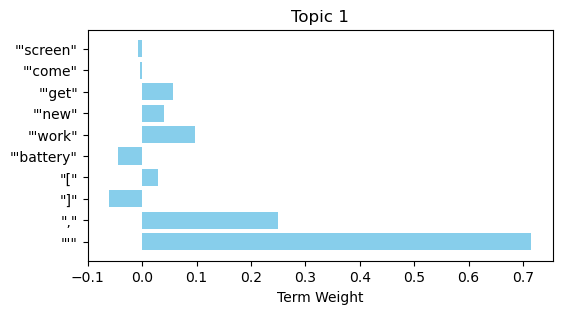

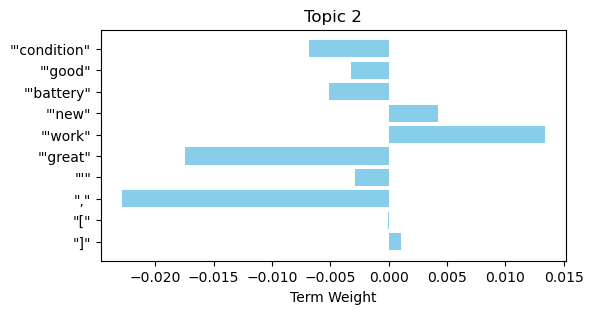

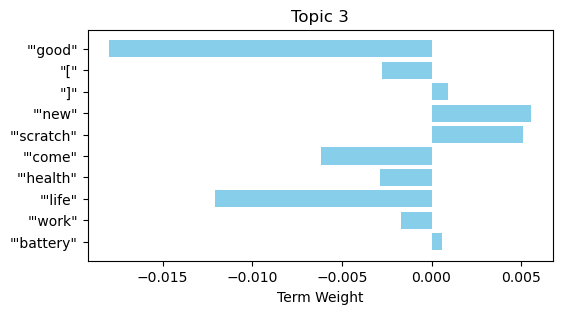

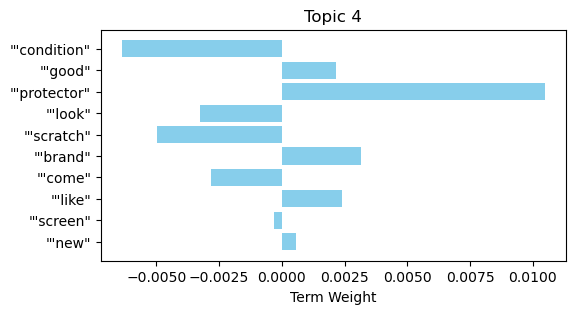

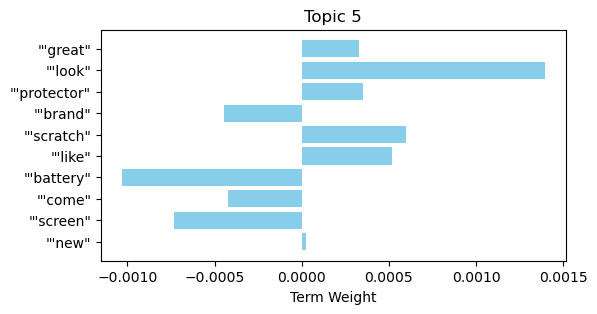

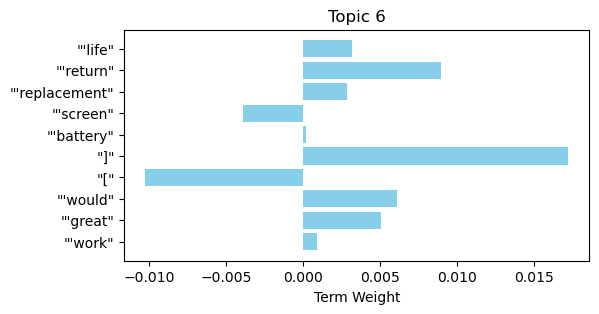

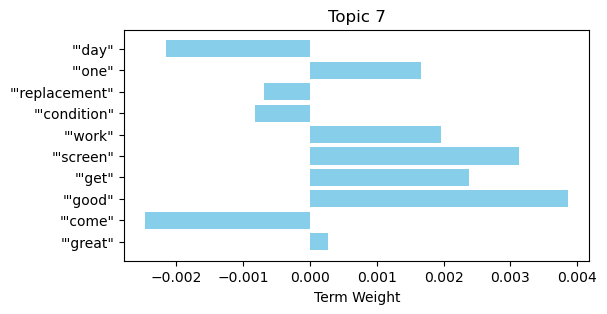

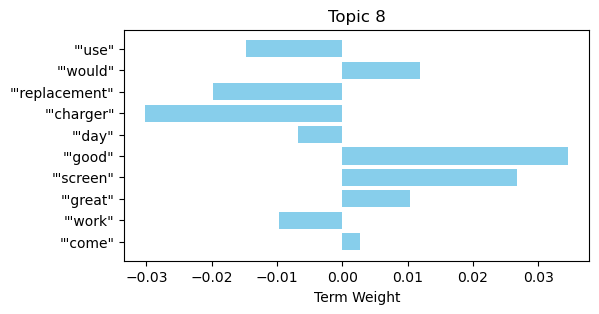

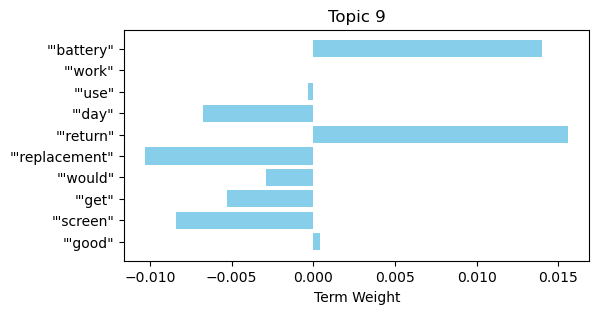

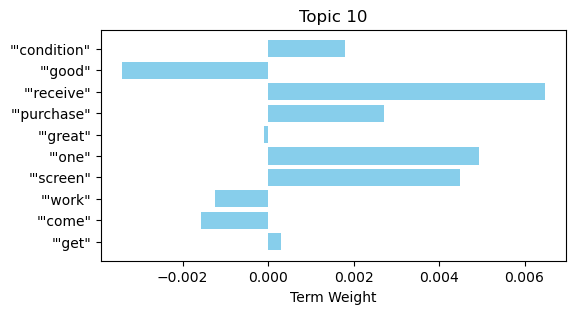

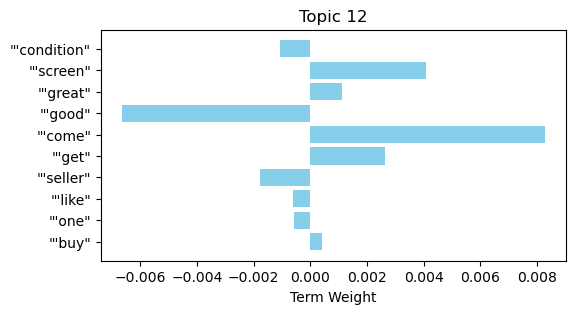

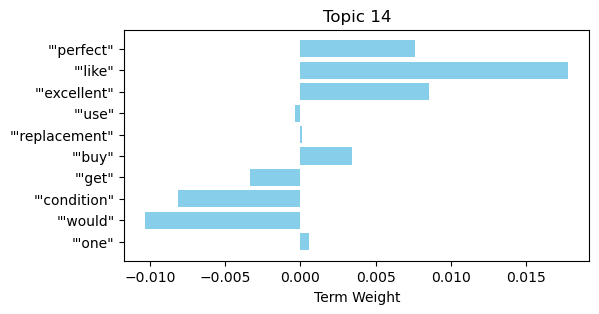

In [3]:
import pandas as pd
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LsiModel
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Positive.xlsx')

# Tokenize the reviews
tokenized_reviews = df['Review'].apply(lambda x: word_tokenize(x))

# Remove POS tags
def remove_pos_tags(tokens):
    return [token for token, pos in pos_tag(tokens)]

# Apply the function to remove POS tags
cleaned_tokenized_reviews = tokenized_reviews.apply(remove_pos_tags)

# Optionally, you may want to remove stopwords at this point
stop_words = set(stopwords.words('english'))
cleaned_tokenized_reviews = cleaned_tokenized_reviews.apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Create a dictionary
dictionary = corpora.Dictionary(cleaned_tokenized_reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in cleaned_tokenized_reviews]

# Creating the object for LSI model using gensim library
LSI = LsiModel

# Build LSI model
lsi_model = LSI(corpus=doc_term_matrix, id2word=dictionary, num_topics=15)

# Get the terms for each topic
topics = lsi_model.print_topics()

# Extract terms and weights for each topic
topic_terms = []
for topic in topics:
    term_list = [term.split("*")[1].strip() for term in topic[1].split(" + ")]
    topic_terms.append(term_list[:10])  # Limit to 10 terms

# Create a bar plot for each topic
for i, terms in enumerate(topic_terms):
    plt.figure(figsize=(6, 3))
    plt.barh(terms, lsi_model.get_topics()[:, i][:10], color='skyblue')
    plt.xlabel('Term Weight')
    plt.title(f'Topic {i + 1}')
    plt.show()


C:\Users\Geetha\anaconda3\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
C:\Users\Geetha\anaconda3\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
C:\Users\Geetha\anaconda3\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
C:\Users\Geetha\anaconda3\Lib\site-packages\scipy\linalg\_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be 

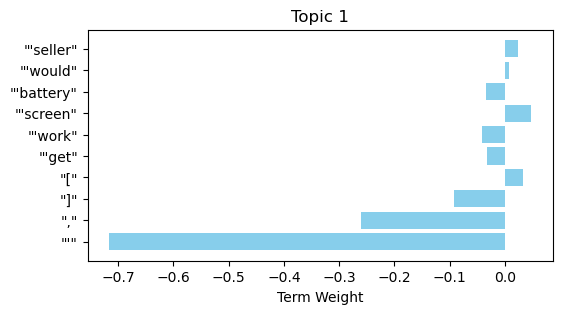

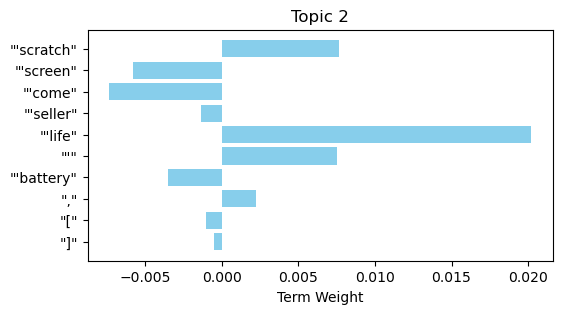

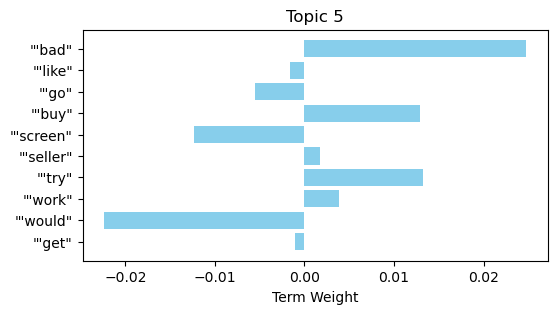

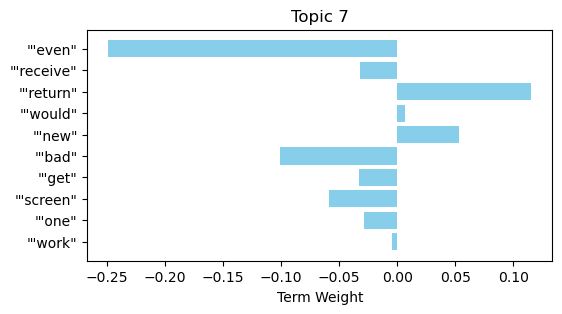

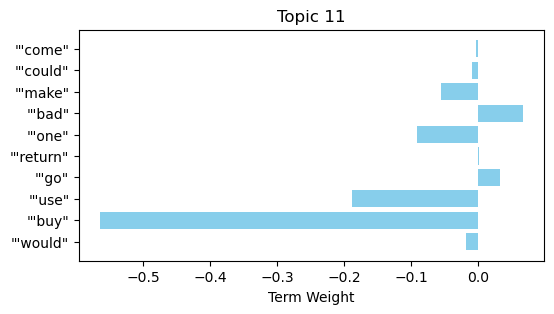

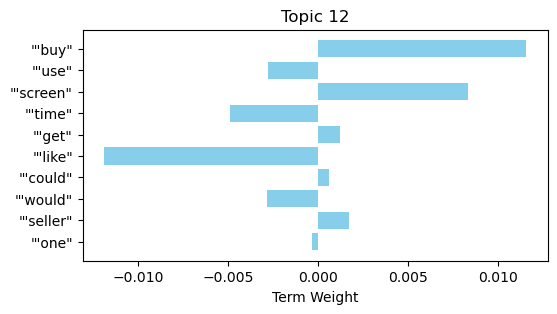

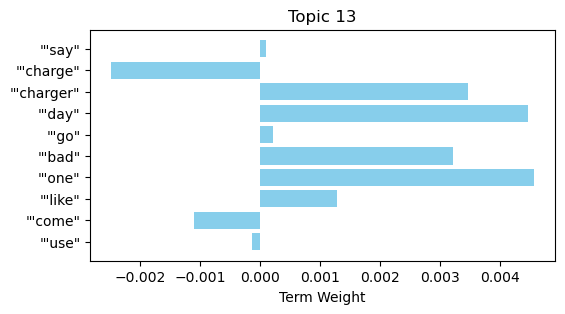

In [4]:
import pandas as pd
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LsiModel
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Negative.xlsx')

# Tokenize the reviews
tokenized_reviews = df['Review'].apply(lambda x: word_tokenize(x))

# Remove POS tags
def remove_pos_tags(tokens):
    return [token for token, pos in pos_tag(tokens)]

# Apply the function to remove POS tags
cleaned_tokenized_reviews = tokenized_reviews.apply(remove_pos_tags)

# Optionally, you may want to remove stopwords at this point
stop_words = set(stopwords.words('english'))
cleaned_tokenized_reviews = cleaned_tokenized_reviews.apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Create a dictionary
dictionary = corpora.Dictionary(cleaned_tokenized_reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in cleaned_tokenized_reviews]

# Creating the object for LSI model using gensim library
LSI = LsiModel

# Build LSI model
lsi_model = LSI(corpus=doc_term_matrix, id2word=dictionary, num_topics=15)

# Get the terms for each topic
topics = lsi_model.print_topics()

# Extract terms and weights for each topic
topic_terms = []
for topic in topics:
    term_list = [term.split("*")[1].strip() for term in topic[1].split(" + ")]
    topic_terms.append(term_list[:10])  # Limit to 10 terms

# Create a bar plot for each topic
for i, terms in enumerate(topic_terms):
    plt.figure(figsize=(6, 3))
    plt.barh(terms, lsi_model.get_topics()[:, i][:10], color='skyblue')
    plt.xlabel('Term Weight')
    plt.title(f'Topic {i + 1}')
    plt.show()


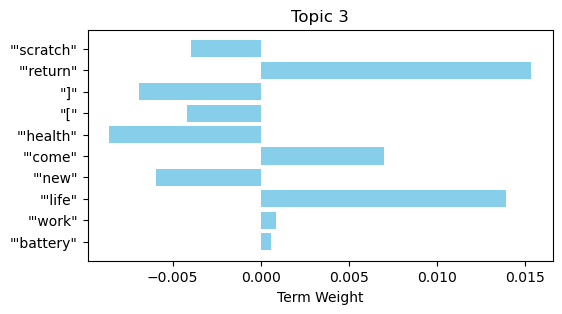

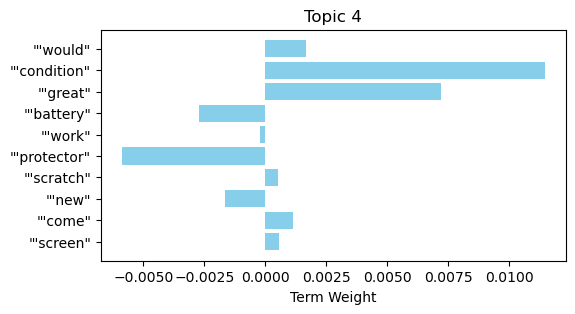

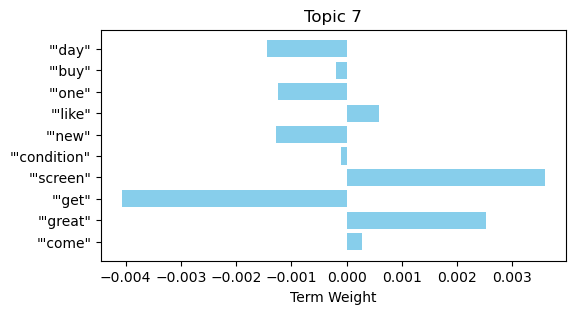

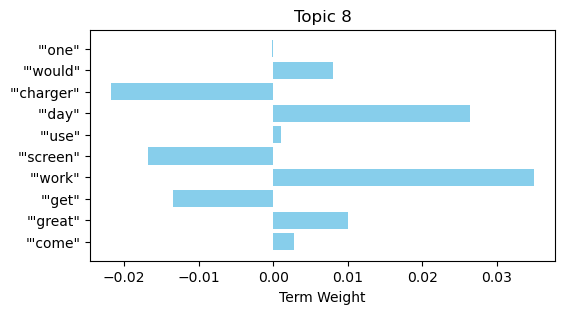

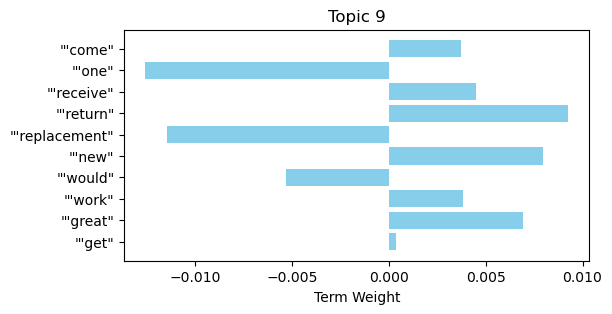

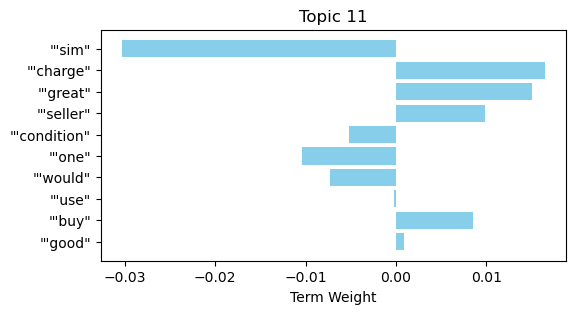

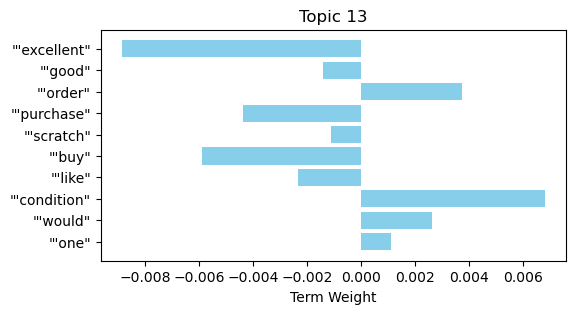

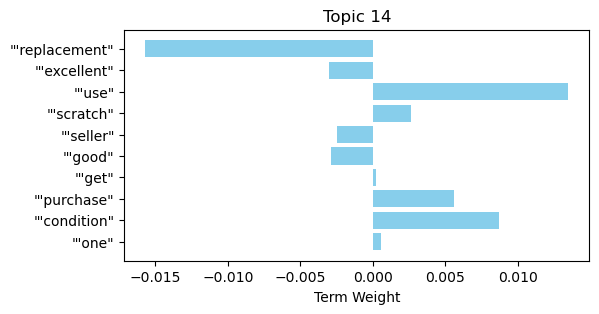

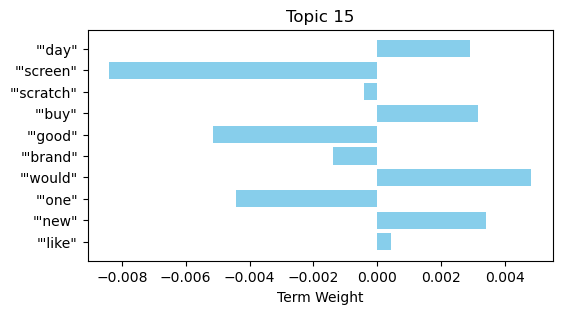

In [6]:
import pandas as pd
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LsiModel
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Amazon_Tokenization.xlsx')

# Tokenize the reviews
tokenized_reviews = df['Review'].apply(lambda x: word_tokenize(x))

# Remove POS tags
def remove_pos_tags(tokens):
    return [token for token, pos in pos_tag(tokens)]

# Apply the function to remove POS tags
cleaned_tokenized_reviews = tokenized_reviews.apply(remove_pos_tags)

# Optionally, you may want to remove stopwords at this point
stop_words = set(stopwords.words('english'))
cleaned_tokenized_reviews = cleaned_tokenized_reviews.apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Create a dictionary
dictionary = corpora.Dictionary(cleaned_tokenized_reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in cleaned_tokenized_reviews]

# Creating the object for LSI model using gensim library
LSI = LsiModel

# Build LSI model
lsi_model = LSI(corpus=doc_term_matrix, id2word=dictionary, num_topics=15)

# Get the terms for each topic
topics = lsi_model.print_topics()

# Extract terms and weights for each topic
topic_terms = []
for topic in topics:
    term_list = [term.split("*")[1].strip() for term in topic[1].split(" + ")]
    topic_terms.append(term_list[:10])  # Limit to 10 terms

# Create a bar plot for each topic
for i, terms in enumerate(topic_terms):
    plt.figure(figsize=(6, 3))
    plt.barh(terms, lsi_model.get_topics()[:, i][:10], color='skyblue')
    plt.xlabel('Term Weight')
    plt.title(f'Topic {i + 1}')
    plt.show()


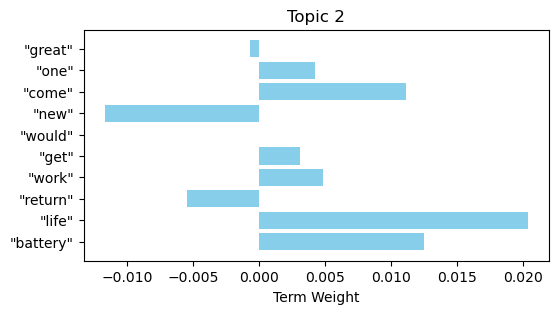

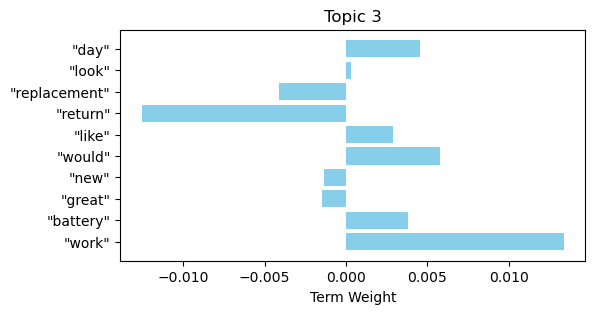

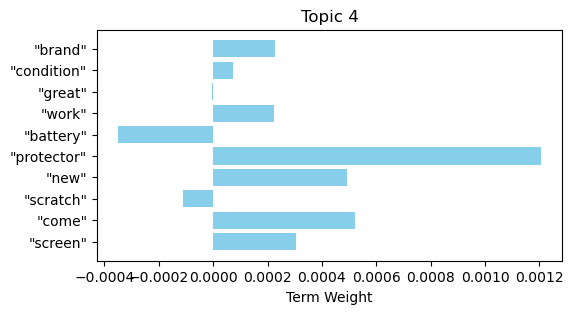

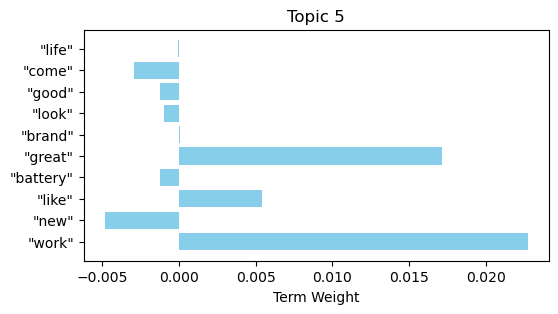

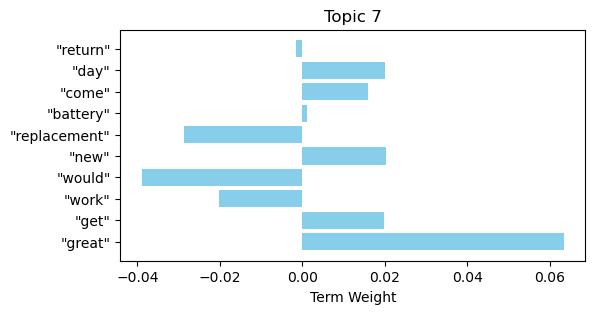

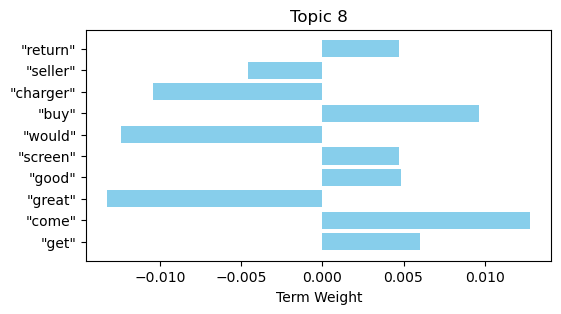

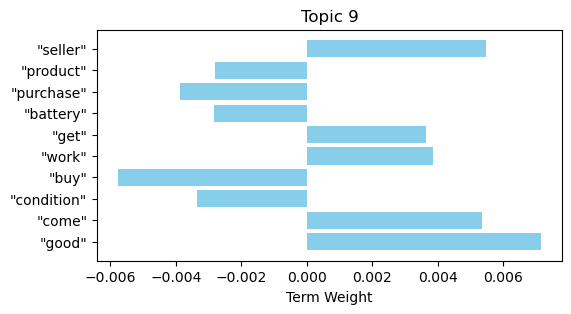

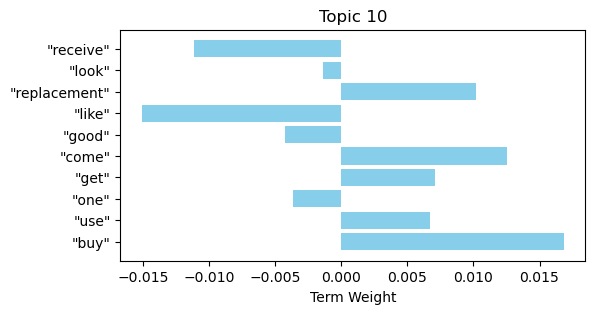

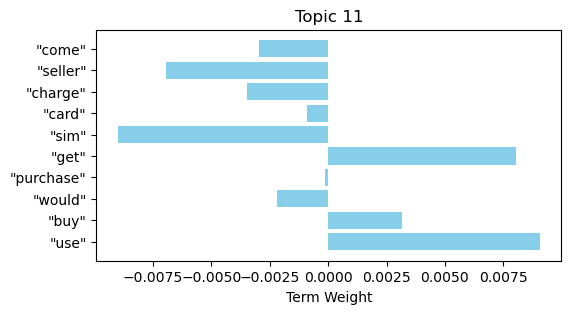

In [8]:
import pandas as pd
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LsiModel
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel('C:\\Users\\Geetha\\OneDrive\\MSc Project\\Code\\29-Dec\\Sentiment Analysis\\Amazon_Lemmatization.xlsx')

# Ensure that the 'Review' column contains strings
df['Review'] = df['Review'].astype(str)

# Tokenize the reviews
tokenized_reviews = df['Review'].apply(lambda x: word_tokenize(x))

# Remove POS tags
def remove_pos_tags(tokens):
    return [token for token, pos in pos_tag(tokens)]

# Apply the function to remove POS tags
cleaned_tokenized_reviews = tokenized_reviews.apply(remove_pos_tags)

# Optionally, you may want to remove stopwords at this point
stop_words = set(stopwords.words('english'))
cleaned_tokenized_reviews = cleaned_tokenized_reviews.apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Create a dictionary
dictionary = corpora.Dictionary(cleaned_tokenized_reviews)

# Convert the tokenized reviews to a bag-of-words representation
doc_term_matrix = [dictionary.doc2bow(rev) for rev in cleaned_tokenized_reviews]

# Creating the object for LSI model using gensim library
LSI = LsiModel

# Build LSI model
lsi_model = LSI(corpus=doc_term_matrix, id2word=dictionary, num_topics=15)

# Get the terms for each topic
topics = lsi_model.print_topics()

# Extract terms and weights for each topic
topic_terms = []
for topic in topics:
    term_list = [term.split("*")[1].strip() for term in topic[1].split(" + ")]
    topic_terms.append(term_list[:10])  # Limit to 10 terms

# Create a bar plot for each topic
for i, terms in enumerate(topic_terms):
    plt.figure(figsize=(6, 3))
    plt.barh(terms, lsi_model.get_topics()[:, i][:10], color='skyblue')
    plt.xlabel('Term Weight')
    plt.title(f'Topic {i + 1}')
    plt.show()


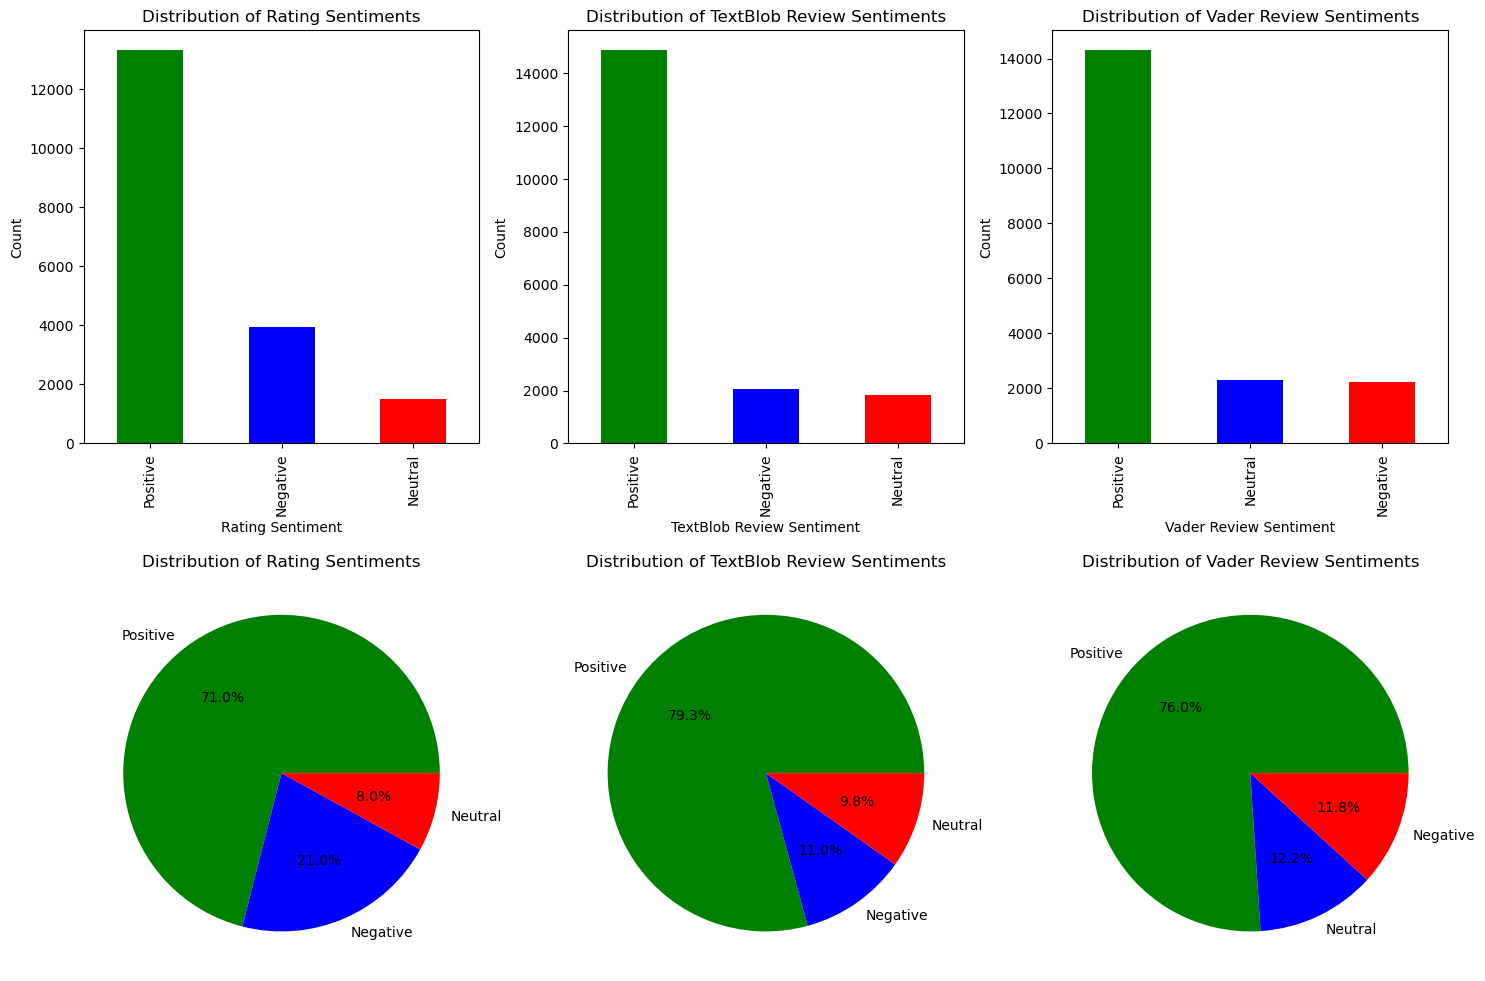

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Sentiment.xlsx file
df = pd.read_excel('Sentiment.xlsx')

# Get the values in the Rating_Sentiment, Text_Blob_Sentiment, and Vader_Sentiment columns
rating_sentiments = df['Rating_Sentiment']
tb_review_sentiments = df['TextBlob_Sentiment']
vader_review_sentiments = df['Vader_Sentiment']

# Count the occurrences of each sentiment value in Rating_Sentiment
rating_sentiment_counts = rating_sentiments.value_counts()

# Count the occurrences of each sentiment value in Text_Blob_Sentiment
tb_review_sentiment_counts = tb_review_sentiments.value_counts()

# Count the occurrences of each sentiment value in Vader_Sentiment
vader_review_sentiment_counts = vader_review_sentiments.value_counts()

# Create subplots for all three plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the distribution of Rating_Sentiment using a bar plot
rating_sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], ax=axes[0, 0])
axes[0, 0].set_xlabel('Rating Sentiment')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Rating Sentiments')

# Plot the distribution of Text_Blob_Sentiment using a bar plot
tb_review_sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], ax=axes[0, 1])
axes[0, 1].set_xlabel('TextBlob Review Sentiment')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of TextBlob Review Sentiments')

# Plot the distribution of Vader_Sentiment using a bar plot
vader_review_sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], ax=axes[0, 2])
axes[0, 2].set_xlabel('Vader Review Sentiment')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Distribution of Vader Review Sentiments')

# Plot the distribution of Rating_Sentiment using a pie chart
axes[1, 0].pie(rating_sentiment_counts, labels=rating_sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
axes[1, 0].set_title('Distribution of Rating Sentiments')

# Plot the distribution of Text_Blob_Sentiment using a pie chart
axes[1, 1].pie(tb_review_sentiment_counts, labels=tb_review_sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
axes[1, 1].set_title('Distribution of TextBlob Review Sentiments')

# Plot the distribution of Vader_Sentiment using a pie chart
axes[1, 2].pie(vader_review_sentiment_counts, labels=vader_review_sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
axes[1, 2].set_title('Distribution of Vader Review Sentiments')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# WordCloud Positive

In [38]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to your Excel file
excel_file_path = 'Amazon_Lemmatization.xlsx'

# Load the data from Excel into a DataFrame
data = pd.read_excel(excel_file_path)

# Filter rows where Rating is 3, 4, or 5
positive_data = data[(data['Rating'] == 4) | (data['Rating'] == 5)]

# Drop rows with missing or NaN values in the 'Review' column
positive_data = positive_data.dropna(subset=['Review'])

# Concatenate text data into a single string
positive_text = ' '.join(positive_data['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# WordCloud Neutral

In [39]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to your Excel file
excel_file_path = 'Amazon_Lemmatization.xlsx'

# Load the data from Excel into a DataFrame
data = pd.read_excel(excel_file_path)

neutral_data = data[(data['Rating'] == 3)]

# Drop rows with missing or NaN values in the 'Review' column
neutral_data = neutral_data.dropna(subset=['Review'])

# Concatenate text data into a single string
neutral_text = ' '.join(neutral_data['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# WordCloud Negative

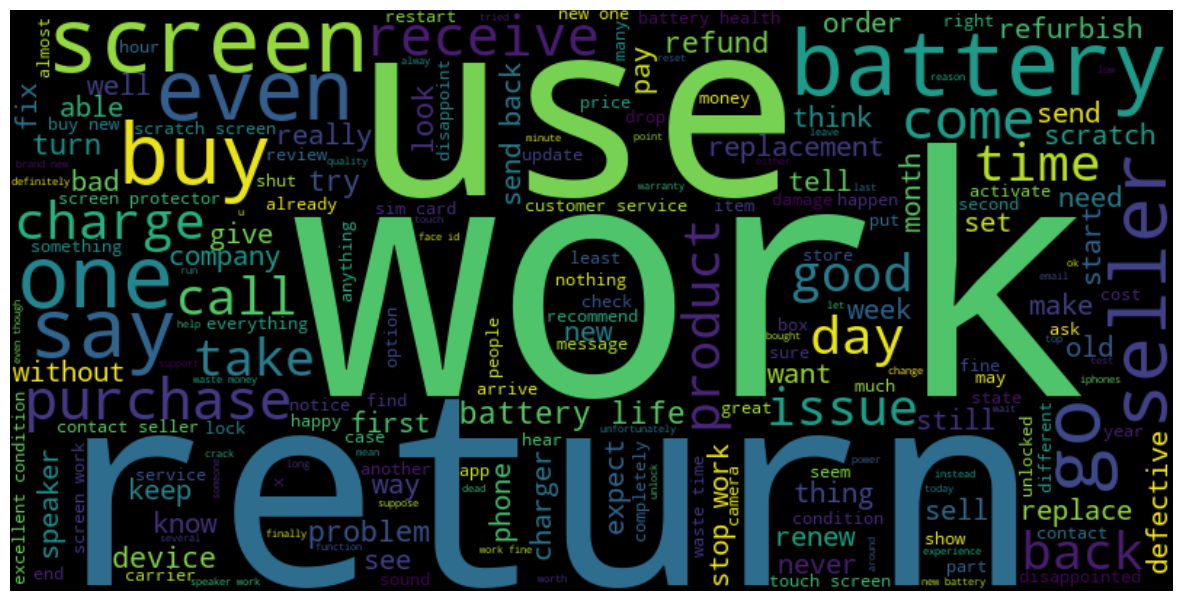

In [40]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to your Excel file
excel_file_path = 'Amazon_Lemmatization.xlsx'

# Load the data from Excel into a DataFrame
data = pd.read_excel(excel_file_path)

# Filter rows where Rating is 1 or 2
negative_data = data[(data['Rating'] == 1) | (data['Rating'] == 2)]

# Drop rows with missing or NaN values in the 'Review' column
negative_data = negative_data.dropna(subset=['Review'])

# Concatenate negative text data into a single string
negative_text = ' '.join(negative_data['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Club By Rating

import pandas as pd
import plotly.express as px

# Load the Sentiment.xlsx file
df = pd.read_excel('Sentiment.xlsx')

# Convert columns to appropriate data types
df['Vader_Negative'] = df['Vader_Negative'].astype(float)
df['Vader_Neutral'] = df['Vader_Neutral'].astype(float)
df['Vader_Positive'] = df['Vader_Positive'].astype(float)
df['Vader_Compound'] = df['Vader_Compound'].astype(float)

# Create an interactive scatterplot using Plotly Express
fig = px.scatter(df, x='Text_Blob_Polarity', y='Vader_Compound', color='Rating', hover_name='Product Name')

# Customize the layout
fig.update_layout(
    title='TextBlob Polarity vs. Vader Compound Score',
    xaxis_title='TextBlob Polarity Score',
    yaxis_title='Vader Compound Score',
    showlegend=True
)

# Show the interactive plot
fig.show()


# Convert Sentiment to Binary

In [43]:
import pandas as pd

# Path to your Excel file
excel_file_path = 'Sentiment.xlsx'

# Read the Excel file into a DataFrame
data = pd.read_excel(excel_file_path)

# Replace values in the specified columns
columns_to_convert = ['Rating_Sentiment', 'TextBlob_Sentiment', 'Vader_Sentiment']

for column in columns_to_convert:
    data[column] = data[column].str.strip().replace({'Positive': 1, 'Neutral': 0, 'Negative': 0})

# Define the path for the CSV file
csv_file_path = 'Sentiment.csv'

# Save the DataFrame as a CSV file
data.to_csv(csv_file_path, index=False)


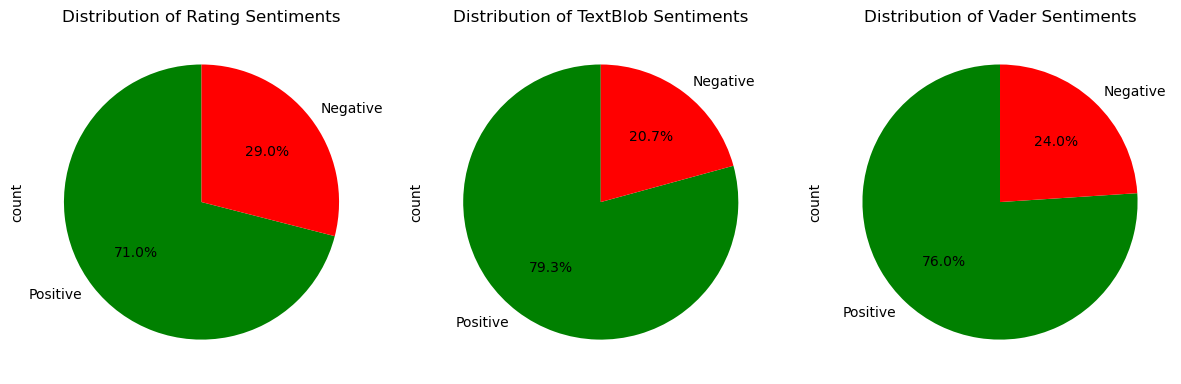

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV file
csv_file_path = 'Sentiment.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path)

# Get the values in the sentiment columns
rating_sentiments = data['Rating_Sentiment']
textblob_sentiments = data['TextBlob_Sentiment']
vader_sentiments = data['Vader_Sentiment']

# Count the occurrences of each sentiment value
rating_sentiment_counts = rating_sentiments.value_counts()
textblob_sentiment_counts = textblob_sentiments.value_counts()
vader_sentiment_counts = vader_sentiments.value_counts()

# Plot the distribution of Rating_Sentiment using a pie chart
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
rating_sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], labels=['Positive', 'Negative'], startangle=90)
plt.title('Distribution of Rating Sentiments')

# Plot the distribution of TextBlob_Sentiment using a pie chart
plt.subplot(1, 3, 2)
textblob_sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], labels=['Positive', 'Negative'], startangle=90)
plt.title('Distribution of TextBlob Sentiments')

# Plot the distribution of Vader_Sentiment using a pie chart
plt.subplot(1, 3, 3)
vader_sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], labels=['Positive', 'Negative'], startangle=90)
plt.title('Distribution of Vader Sentiments')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


True Positives (TP): 15,201
True Negatives (TN): 5,022
False Positives (FP): 1,077
False Negatives (FN): 540
In this context:

True Positives (TP) are the number of correctly predicted instances of class 1 (positive).
True Negatives (TN) are the number of correctly predicted instances of class 0 (negative).
False Positives (FP) are the number of instances predicted as class 1 (positive) when they are actually class 0 (negative).
False Negatives (FN) are the number of instances predicted as class 0 (negative) when they are actually class 1 (positive).

# TfidfVectorizer

                        Accuracy  Precision    Recall  F1-score  \
LogisticRegression      0.948602   0.948317  0.948602  0.947100   
DecisionTreeClassifier  0.963249   0.963046  0.963249  0.963128   
RandomForestClassifier  0.968309   0.968365  0.968309  0.967699   
KNeighborsClassifier    0.436218   0.809139  0.436218  0.448093   
MLPClassifier           0.972570   0.972490  0.972570  0.972525   

                                Confusion Matrix  
LogisticRegression      [[636, 153], [40, 2926]]  
DecisionTreeClassifier   [[713, 76], [62, 2904]]  
RandomForestClassifier   [[691, 98], [21, 2945]]  
KNeighborsClassifier    [[746, 43], [2074, 892]]  
MLPClassifier            [[734, 55], [48, 2918]]  


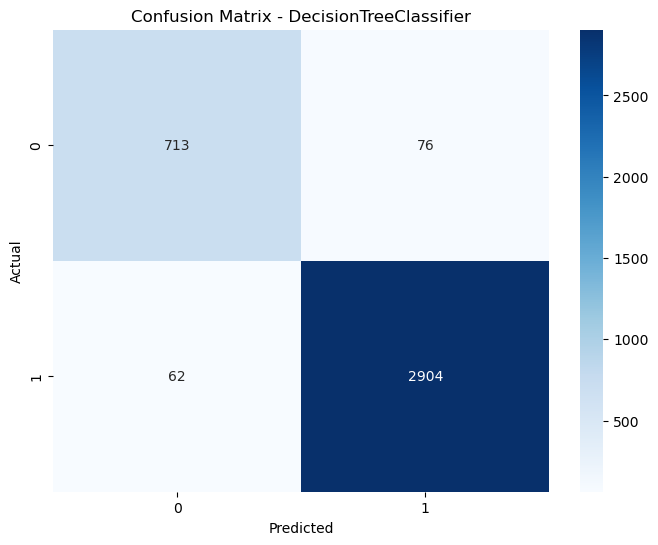

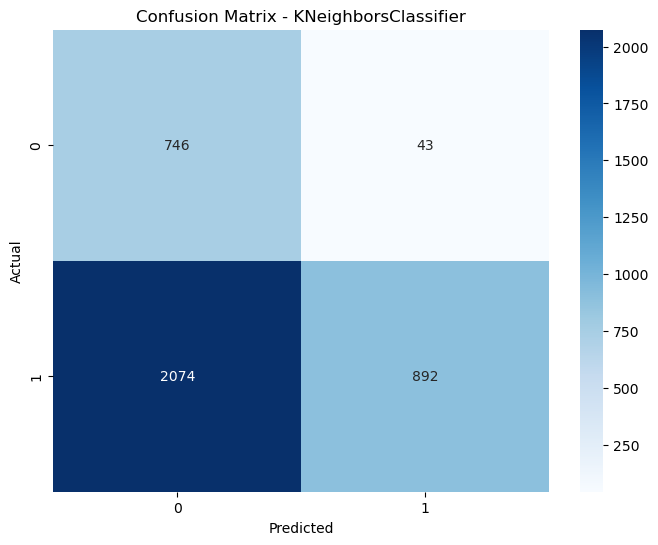

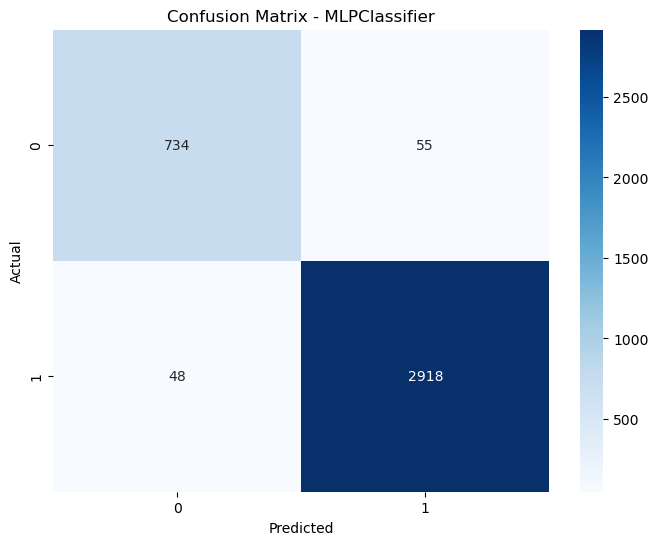

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

csv_file_path = 'Sentiment.csv' 
df = pd.read_csv(csv_file_path)
df.dropna(subset=['Review'], inplace=True)
df.dropna(subset=['Rating_Sentiment', 'TextBlob_Sentiment', 'Vader_Sentiment'], inplace=True)

# Define your X and y based on your dataset
X = df['Review']
y = df['TextBlob_Sentiment']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit the TF-IDF vectorizer on the entire dataset
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Initialize a dictionary to store the results
results = {}

# Iterate through each classifier
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(
        hidden_layer_sizes=(5, 4, 3),  # Three hidden layers with 5, 4, and 3 neurons
        activation='relu',  # Activation function for hidden layers
        solver='adam',  # Optimization algorithm
        max_iter=1000)
}

for classifier_name, classifier in classifiers.items():
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred_classifier = classifier.predict(X_test)

    # Calculate and store accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred_classifier)
    precision = precision_score(y_test, y_pred_classifier, average='weighted')
    recall = recall_score(y_test, y_pred_classifier, average='weighted')
    f1 = f1_score(y_test, y_pred_classifier, average='weighted')

    results[classifier_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
    }

    # Calculate and store the confusion matrix
    cm_classifier = confusion_matrix(y_test, y_pred_classifier)
    results[classifier_name]['Confusion Matrix'] = cm_classifier

# Display the results in table format
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

# Plot the confusion matrices as heatmaps
for classifier_name in classifiers.keys():
    cm_classifier = results[classifier_name]['Confusion Matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_classifier, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()


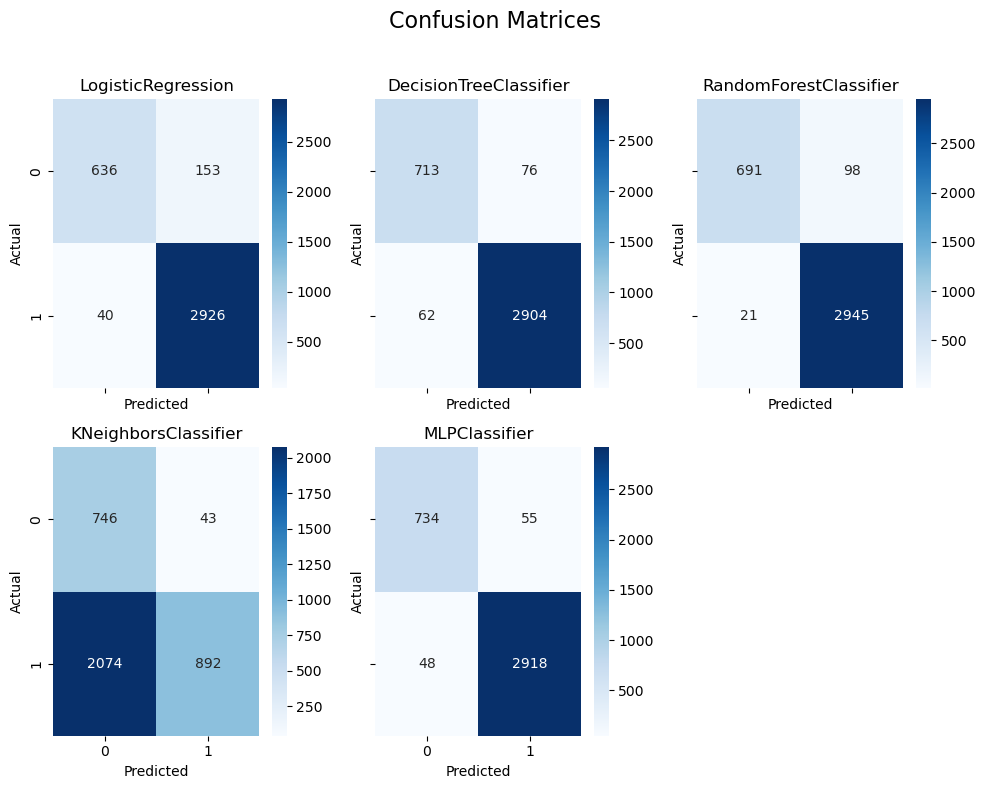

In [9]:
import math

# Calculate the number of rows and columns for the subplots
num_classifiers = len(classifiers)
num_cols = 3
num_rows = math.ceil(num_classifiers / num_cols)

# Plot the confusion matrices as separate subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows), sharex=True, sharey=True)
fig.suptitle('Confusion Matrices', fontsize=16)

for i, (classifier_name, ax) in enumerate(zip(classifiers.keys(), axes.flatten())):
    if i < num_classifiers:  # Skip empty subplots
        cm_classifier = results[classifier_name]['Confusion Matrix']
        sns.heatmap(cm_classifier, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True, ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(classifier_name)

# Remove any remaining empty subplots
for i in range(num_classifiers, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Word2Vec

The vocabulary is built
Word2Vec vocabulary length:  12580
                        Accuracy  Precision    Recall  F1-score  \
LogisticRegression      0.846605   0.834755  0.846605  0.832541   
DecisionTreeClassifier  0.919840   0.919516  0.919840  0.919671   
RandomForestClassifier  0.942477   0.941884  0.942477  0.940713   
KNeighborsClassifier    0.853529   0.846827  0.853529  0.834428   
MLPClassifier           0.868708   0.863650  0.868708  0.865318   

                                 Confusion Matrix  
LogisticRegression      [[353, 436], [140, 2826]]  
DecisionTreeClassifier  [[634, 155], [146, 2820]]  
RandomForestClassifier   [[622, 167], [49, 2917]]  
KNeighborsClassifier     [[322, 467], [83, 2883]]  
MLPClassifier           [[492, 297], [196, 2770]]  


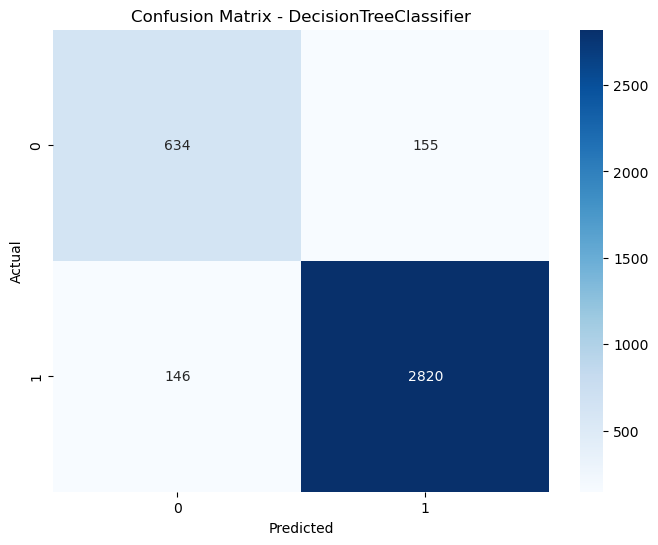

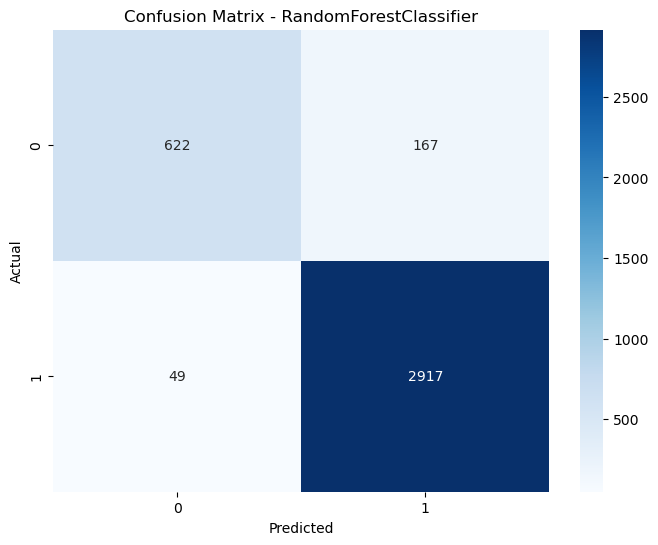

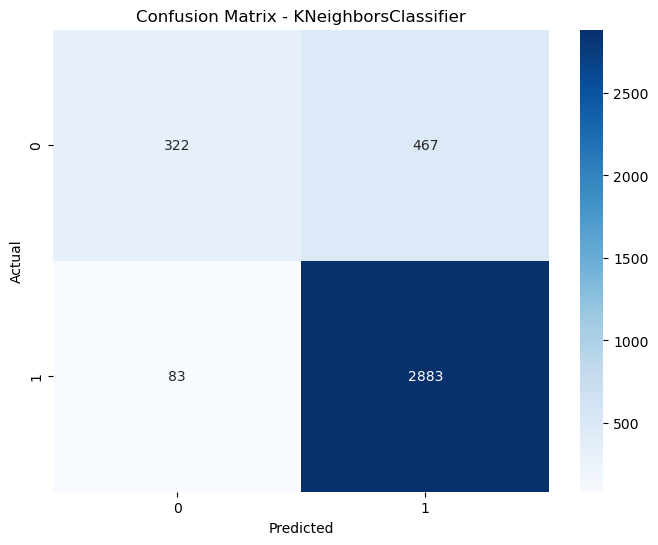

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from gensim.models import Word2Vec
import numpy as np

# Read the Excel file into a Pandas DataFrame
df = pd.read_csv("Sentiment.csv")

# Ensure that the "Review" column contains strings and handle non-string values
df["Review"] = df["Review"].apply(lambda text: text if isinstance(text, str) else "")

# Remove rows with empty "Review" values
df = df[df["Review"] != ""]

# Tokenize the text (assuming it's already tokenized)
df["Review"] = df["Review"].apply(lambda text: text.split())

# Define the parameters for your Word2Vec model
sg = 1  # Skip-gram model
seed = 42  # Random seed for reproducibility
num_workers = 4  # Number of CPU cores to use for training
vector_size = 100  # Dimensionality of word vectors
min_word_count = 1  # Minimum word count threshold
context_size = 5  # Context window size

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=df["Review"],
                          sg=sg,
                          seed=seed,
                          workers=num_workers,
                          vector_size=vector_size,
                          min_count=min_word_count,
                          window=context_size)

print("The vocabulary is built")
print("Word2Vec vocabulary length: ", len(word2vec_model.wv.index_to_key))

# Calculate the average vectors for the reviews
def averageVector(reviews, w2v):
    total = []
    for review in reviews:
        avgVector = np.zeros(w2v.vector_size)  # Initialize the average vector with zeros
        count = 0
        for word in review:
            if word in w2v.wv:
                count += 1
                avgVector = np.add(avgVector, w2v.wv[word])
        if count > 0:
            avgVector = np.divide(avgVector, count)
        total.append(avgVector)
    return total

# Calculate average vectors for the reviews using Word2Vec
X_word2vec = averageVector(df["Review"], word2vec_model)

# Define your X and y based on your dataset
X = X_word2vec
y_text_blob = df['TextBlob_Sentiment']

# Ensure that X and y have the same number of rows
if len(X) != len(y_text_blob):
    raise ValueError("X and y have different numbers of rows.")

# Create a dictionary to store the results
results = {}

classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(
        hidden_layer_sizes=(5, 4, 3),  # Three hidden layers with 5, 4, and 3 neurons
        activation='relu',  # Activation function for hidden layers
        solver='adam',  # Optimization algorithm
        max_iter=1000)
}

for classifier_name, classifier in classifiers.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y_text_blob, test_size=0.2, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[classifier_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
    }

    cm = confusion_matrix(y_test, y_pred)
    results[classifier_name]['Confusion Matrix'] = cm

results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

for classifier_name in classifiers.keys():
    cm = results[classifier_name]['Confusion Matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()


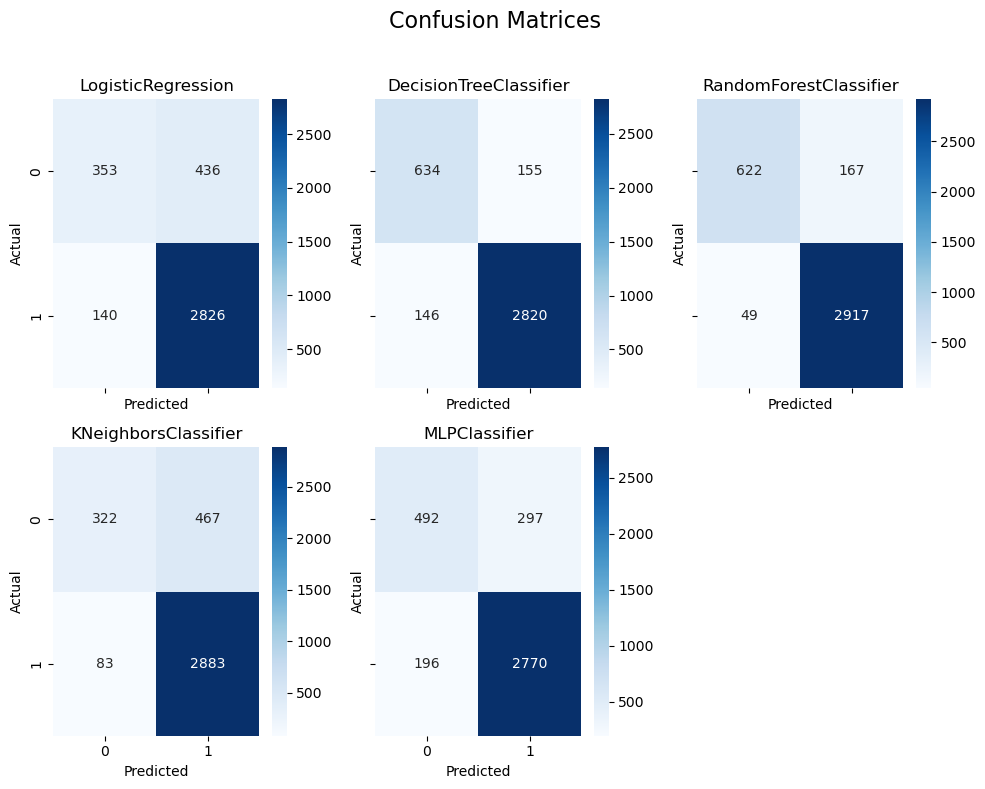

In [12]:
import math

# Calculate the number of rows and columns for the subplots
num_classifiers = len(classifiers)
num_cols = 3
num_rows = math.ceil(num_classifiers / num_cols)

# Plot the confusion matrices as separate subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows), sharex=True, sharey=True)
fig.suptitle('Confusion Matrices', fontsize=16)

for i, (classifier_name, ax) in enumerate(zip(classifiers.keys(), axes.flatten())):
    if i < num_classifiers:  # Skip empty subplots
        cm_classifier = results[classifier_name]['Confusion Matrix']
        sns.heatmap(cm_classifier, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True, ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(classifier_name)

# Remove any remaining empty subplots
for i in range(num_classifiers, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Bag of Words (BoW)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load your dataset and handle missing values
csv_file_path = 'Sentiment.csv'  # Replace with the path to your dataset
df = pd.read_csv(csv_file_path)
df.dropna(subset=['Review'], inplace=True)
df.dropna(subset=['Text_Blob_Sentiment', 'Vader_Sentiment'], inplace=True)

# Define your X and y based on your dataset
X = df['Review']
y_rating = df['Rating_Sentiment']
y_text_blob = df['Text_Blob_Sentiment']
y_vader = df['Vader_Sentiment']

count_vectorizer = CountVectorizer()

X_bow = count_vectorizer.fit_transform(X)

# Initialize a dictionary to store the results
results = {}

# Iterate through each sentiment column
for sentiment_col, y_current in [('Rating_Sentiment', y_rating), ('Text_Blob_Sentiment', y_text_blob), ('Vader_Sentiment', y_vader)]:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_bow, y_current, test_size=0.2, random_state=42)

    # Define the classifiers
    classifiers = {
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'SGDClassifier': SGDClassifier(max_iter=1000),
        'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }

    for classifier_name, classifier in classifiers.items():
        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)

        # Predict on the test data
        y_pred_classifier = classifier.predict(X_test)

        # Calculate and store accuracy, precision, recall, and F1-score
        accuracy = accuracy_score(y_test, y_pred_classifier)
        precision = precision_score(y_test, y_pred_classifier, average='weighted')
        recall = recall_score(y_test, y_pred_classifier, average='weighted')
        f1 = f1_score(y_test, y_pred_classifier, average='weighted')

        results[sentiment_col + '_' + classifier_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
        }

        # Calculate and store the confusion matrix
        cm_classifier = confusion_matrix(y_test, y_pred_classifier)
        results[sentiment_col + '_' + classifier_name]['Confusion Matrix'] = cm_classifier

# Display the results in table format
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

# Plot the confusion matrices as heatmaps
for sentiment_col, y_current in [('Rating_Sentiment', y_rating), ('Text_Blob_Sentiment', y_text_blob), ('Vader_Sentiment', y_vader)]:
    for classifier_name in classifiers.keys():
        cm_classifier = results[sentiment_col + '_' + classifier_name]['Confusion Matrix']
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_classifier, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix of {sentiment_col} - {classifier_name}')
        plt.show()


                        Accuracy  Precision    Recall  F1-score  \
LogisticRegression      0.978695   0.978738  0.978695  0.978715   
DecisionTreeClassifier  0.972304   0.972092  0.972304  0.972091   
RandomForestClassifier  0.970706   0.970806  0.970706  0.970166   
KNeighborsClassifier    0.831691   0.863956  0.831691  0.841206   
MLPClassifier           0.982690   0.982778  0.982690  0.982726   

                                 Confusion Matrix  
LogisticRegression        [[751, 38], [42, 2924]]  
DecisionTreeClassifier    [[721, 68], [36, 2930]]  
RandomForestClassifier    [[697, 92], [18, 2948]]  
KNeighborsClassifier    [[636, 153], [479, 2487]]  
MLPClassifier             [[761, 28], [37, 2929]]  


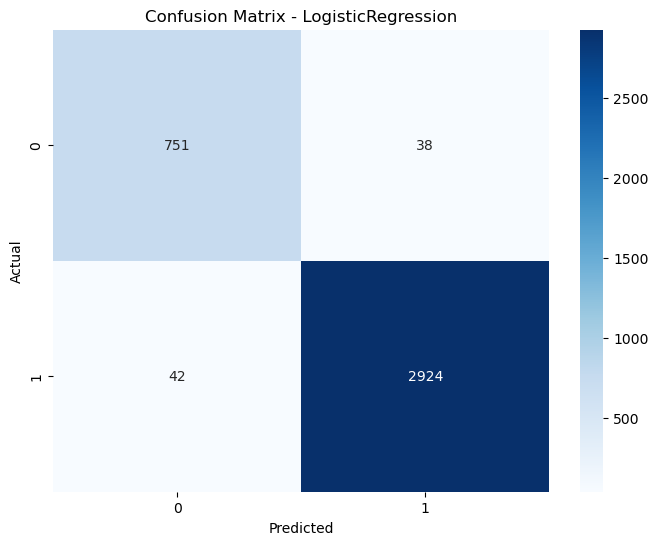

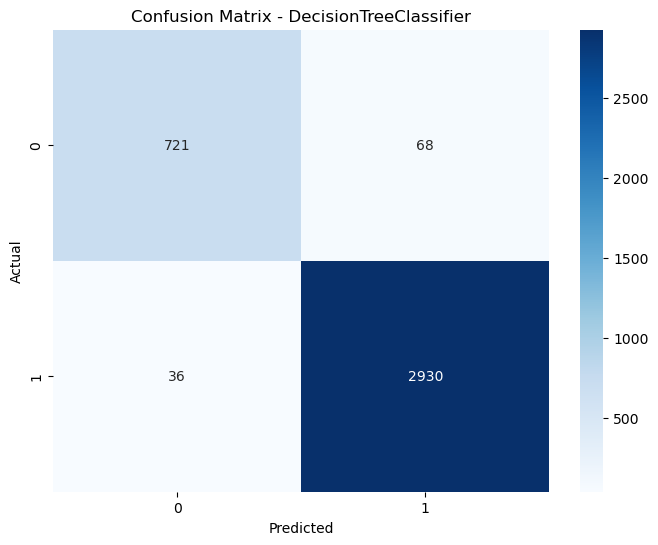

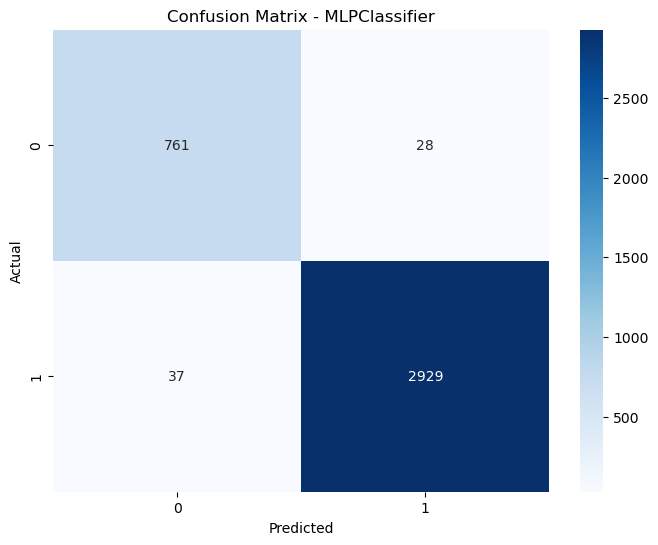

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load your dataset and handle missing values
csv_file_path = 'Sentiment.csv'  # Replace with the path to your dataset
df = pd.read_csv(csv_file_path)
df.dropna(subset=['Review'], inplace=True)
df.dropna(subset=['TextBlob_Sentiment', 'Vader_Sentiment'], inplace=True)

# Define your X and y based on your dataset
X = df['Review']
y_text_blob = df['TextBlob_Sentiment']

count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(X)

# Initialize a dictionary to store the results
results = {}

# Define the classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(
        hidden_layer_sizes=(5, 4, 3),  # Three hidden layers with 5, 4, and 3 neurons
        activation='relu',  # Activation function for hidden layers
        solver='adam',  # Optimization algorithm
        max_iter=1000
    )
}

# Iterate through each sentiment column
for classifier_name, classifier in classifiers.items():
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_bow, y_text_blob, test_size=0.2, random_state=42)

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred_classifier = classifier.predict(X_test)

    # Calculate and store accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred_classifier)
    precision = precision_score(y_test, y_pred_classifier, average='weighted')
    recall = recall_score(y_test, y_pred_classifier, average='weighted')
    f1 = f1_score(y_test, y_pred_classifier, average='weighted')

    results[classifier_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
    }

    # Calculate and store the confusion matrix
    cm_classifier = confusion_matrix(y_test, y_pred_classifier)
    results[classifier_name]['Confusion Matrix'] = cm_classifier

# Display the results in table format
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

# Plot the confusion matrices as heatmaps
for classifier_name in classifiers.keys():
    cm_classifier = results[classifier_name]['Confusion Matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_classifier, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()


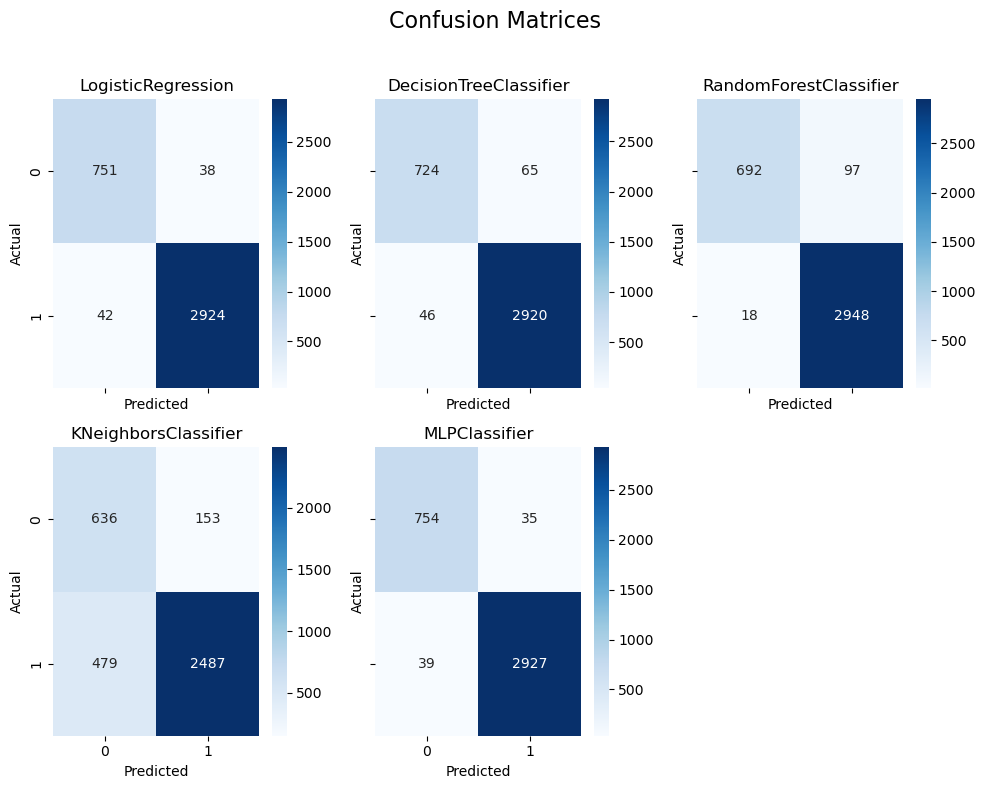

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Load your dataset and handle missing values
csv_file_path = 'Sentiment.csv'  # Replace with the path to your dataset
df = pd.read_csv(csv_file_path)
df.dropna(subset=['Review'], inplace=True)
df.dropna(subset=['TextBlob_Sentiment', 'Vader_Sentiment'], inplace=True)

# Define your X and y based on your dataset
X = df['Review']
y_text_blob = df['TextBlob_Sentiment']

count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(X)

# Initialize a dictionary to store the confusion matrices
confusion_matrices = {}

# Define the classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(
        hidden_layer_sizes=(5, 4, 3),  # Three hidden layers with 5, 4, and 3 neurons
        activation='relu',  # Activation function for hidden layers
        solver='adam',  # Optimization algorithm
        max_iter=1000
    )
}

# Iterate through each sentiment classifier
for classifier_name, classifier in classifiers.items():
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_bow, y_text_blob, test_size=0.2, random_state=42)

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred_classifier = classifier.predict(X_test)

    # Calculate and store the confusion matrix
    cm_classifier = confusion_matrix(y_test, y_pred_classifier)
    confusion_matrices[classifier_name] = cm_classifier

# Display the confusion matrices as heatmaps
num_classifiers = len(classifiers)
num_cols = 3
num_rows = math.ceil(num_classifiers / num_cols)

# Plot the confusion matrices as separate subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows), sharex=True, sharey=True)
fig.suptitle('Confusion Matrices', fontsize=16)

for i, (classifier_name, ax) in enumerate(zip(classifiers.keys(), axes.flatten())):
    if i < num_classifiers:  # Skip empty subplots
        cm_classifier = confusion_matrices[classifier_name]
        sns.heatmap(cm_classifier, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True, ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(classifier_name)

# Remove any remaining empty subplots
for i in range(num_classifiers, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


https://jwr1015.github.io/links/final_case_analysis_josh.html

https://realpython.com/python-nltk-sentiment-analysis/